## Python / Réseau de neurones

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

### Chargement des données

In [4]:
## Loading datas
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Affichage des informations des données

In [5]:
print('Shape of train images')
print(train_images.shape[0])
print(train_images.shape)
print('Shape of train labels')
print(train_labels.shape)

Shape of train images
60000
(60000, 28, 28)
Shape of train labels
(60000,)


### Sélection des données

In [6]:
## On ne prend qu'une partie des données
NN = input("Combien d'images pour l'entrainement ?")
while int(NN) > train_images.shape[0]:
    print("Valeur non possible")
    NN = input("Combien d'images pour l'entrainement ?")
train_images = train_images[:int(NN)]
train_labels = train_labels[:int(NN)]

print('After RESHAPE !!')
print('Shape of train images')
print(train_images.shape)
print('Shape of train labels')
print(train_labels.shape)

Combien d'images pour l'entrainement ?10000
After RESHAPE !!
Shape of train images
(10000, 28, 28)
Shape of train labels
(10000,)


### Normalisation des données

In [7]:
## On normalise les données
max_img = train_images.max()
train_images = train_images / max_img
test_images = test_images / max_img

## Définition du modèle

In [10]:
model = keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='selu'))
model.add(keras.layers.Dense(128, activation='selu'))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.build(input_shape=(28,28,1))

In [11]:
## Compilation du modele
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 352,298
Trainable params: 352,298
Non-trainable params: 0
________________________________________________

## Entrainement du réseau

Entrainement sur le set de données (train_images) sur 10 epochs - Cette étape peut prendre du temps en fonction de la complexité du modèle et du nombre d'epochs.

In [8]:
print(train_images.shape)
print(test_images.shape)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
print(train_images.shape)

(1000, 28, 28)
(10000, 28, 28)
(1000, 28, 28, 1)


In [9]:
history = model.fit(train_images, train_labels, epochs=10, steps_per_epoch=20, validation_data=(test_images, test_labels))

Epoch 1/10


2022-04-20 20:56:15.192300: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-20 20:56:15.193049: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1996250000 Hz


20/20 [==============================] - 3s 123ms/step - loss: 1.6348 - accuracy: 0.4630 - val_loss: 0.7672 - val_accuracy: 0.7340
Epoch 2/10
20/20 [==============================] - 2s 99ms/step - loss: 0.5402 - accuracy: 0.8188 - val_loss: 0.5743 - val_accuracy: 0.7852
Epoch 3/10
20/20 [==============================] - 2s 91ms/step - loss: 0.4214 - accuracy: 0.8636 - val_loss: 0.5404 - val_accuracy: 0.8070
Epoch 4/10
20/20 [==============================] - 1s 48ms/step - loss: 0.3246 - accuracy: 0.9024 - val_loss: 0.5185 - val_accuracy: 0.8127
Epoch 5/10
20/20 [==============================] - 1s 48ms/step - loss: 0.2664 - accuracy: 0.9072 - val_loss: 0.5107 - val_accuracy: 0.8209
Epoch 6/10
20/20 [==============================] - 1s 46ms/step - loss: 0.2076 - accuracy: 0.9273 - val_loss: 0.6213 - val_accuracy: 0.7879
Epoch 7/10
20/20 [==============================] - 1s 42ms/step - loss: 0.1653 - accuracy: 0.9529 - val_loss: 0.5054 - val_accuracy: 0.8284
Epoch 8/10
20/20 [=====

### Résultats

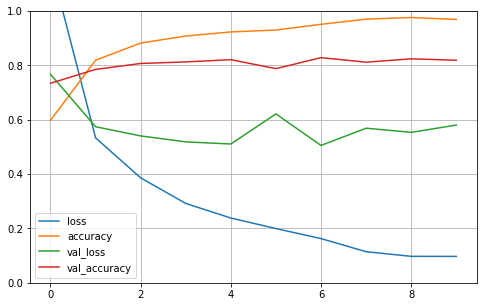

In [10]:
## Affichage des couts au cours des epochs
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

### Prédictions sur un autre set de données

In [11]:
y_proba = model.predict(test_images)
y_pred = y_proba.argmax(axis=1)   # pour obtenir l'indice de la case max
print("Valeurs vraies : "+str(test_labels))
print("Predictions    : "+str(y_pred))

Valeurs vraies : [9 2 1 ... 8 1 5]
Predictions    : [9 2 1 ... 8 1 5]
